### Import libs

In [24]:
import pandas as pd
import math
import matplotlib.pyplot as plt

from math import sqrt
from matplotlib import pyplot
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Import data 

In [25]:
df_american = pd.read_excel(r'/Users/dilianaserafimova/Desktop/df_american_clean.xlsx')

### Date to index 

In [26]:
df_american = df_american.set_index(['date'])

In [27]:
df_american.head()

,pax_count,revenue,seat_miles,load_factor,flights
date,,,,,
2003-01-01,7013818,9405547,14038698,67.00,78214
2003-02-01,6363926,8355084,12142241,68.81,67463
2003-03-01,7628481,9981627,13929984,71.66,77125
2003-04-01,7103085,9325622,13210596,70.59,73182
2003-05-01,7447462,9838460,13345197,73.72,73381


### Train Test Set 

In [28]:
X = df_american[['revenue', 'seat_miles', 'load_factor', 'flights']]

In [29]:
y = df_american['pax_count']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = False)

### Model 

In [31]:
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_train, y_train)
    print(k, confidence)

linear -322.84118669513833
poly -0.05872503075161206
rbf -0.059071163046023
sigmoid -0.05908043396720086


### Fit model

In [46]:
svr_model = SVR(kernel='rbf', C=1e4, gamma=0.1)
svr_model.fit(X_train, y_train)

SVR(C=10000.0, gamma=0.1)

### Prediction 

In [47]:
train_predict = svr_model.predict(X_train)

### Evaluation

In [48]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

In [49]:
print("Training Evaluation - SVR")
print("RMSE", ":", rmse(y_train, train_predict))

Training Evaluation - SVR
RMSE : 1532264.9806529817


### Plot 

In [50]:
def plot_stores(actual, predictions):
    title = 'Pax Prediction'
    act = plt.plot(actual, color='turquoise', label='Actual')
    pred = plt.plot(predictions, color='darkgoldenrod', label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Paxes")
    plt.legend(loc='best')
    plt.title(title)
    plt.show()

In [51]:
train_predict = pd.DataFrame([[x, y] for x, y in zip(y_train.index,train_predict)], columns=["date", "pred"])
train_predict = train_predict.set_index('date')

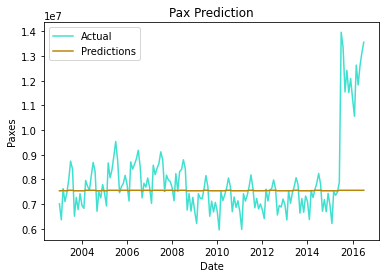

In [52]:
plot_stores(y_train, train_predict)